In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Depression_Student_Dataset_Unclean.csv")
data.head()

,ID,Gender,Age,Academic Pressure,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,28.0,2.0,7-8 hours,Moderate,Yes,9.0,2.0,Yes,No
1,2,Male,28.0,NaN,5-6 hours,Healthy,Yes,7.0,NaN,Yes,No
2,3,Male,25.0,1.0,5-6 hours,Unhealthy,Yes,10.0,4.0,No,Yes
3,4,Male,23.0,1.0,More than 8 hours,Unhealthy,Yes,7.0,2.0,Yes,No
4,5,Female,31.0,1.0,More than 8 hours,Healthy,Yes,4.0,2.0,Yes,No


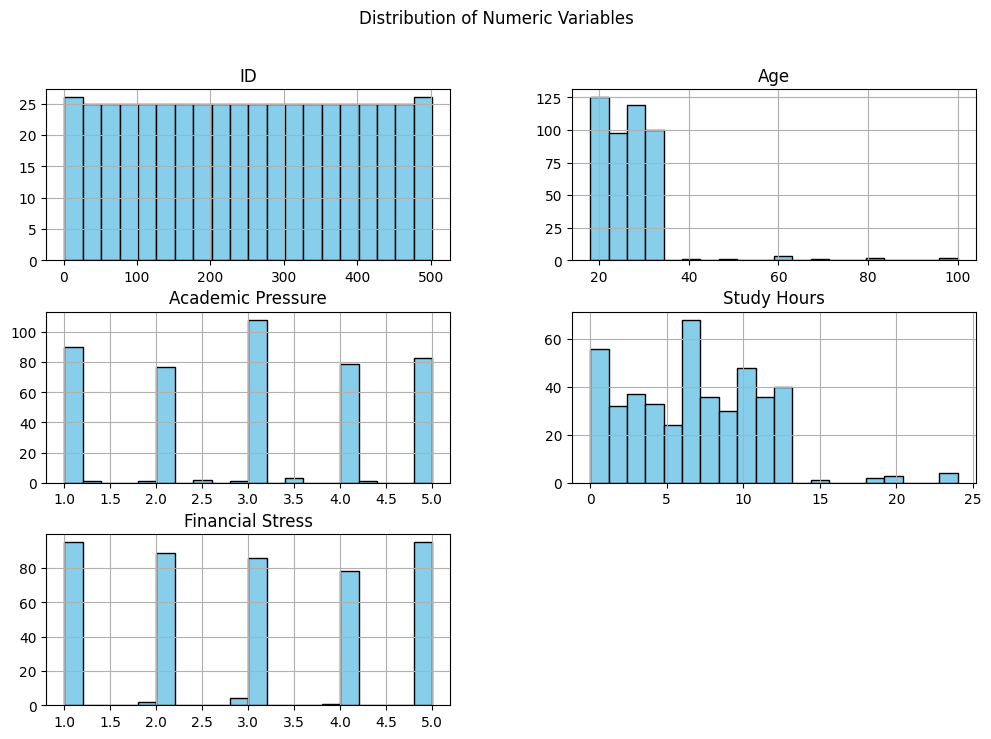

In [32]:
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables")
plt.show()

The histograms reveal key insights into the numeric variables of the dataset. The ID variable is uniformly distributed, while Age shows a strong concentration among younger individuals (20–25 years). Academic Pressure and Financial Stress exhibit a similar pattern, with distinct peaks suggesting categorical survey responses. The Study Hours distribution is skewed, indicating that most students study between 0 to 10 hours, with very few exceeding 15 hours. These patterns provide an overview of the dataset's structure and highlight potential areas for deeper analysis.

In [33]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                      50
Academic Pressure                        56
Sleep Duration                           15
Dietary Habits                           10
Have you ever had suicidal thoughts ?     8
Study Hours                              52
Financial Stress                         52
Family History of Mental Illness         13
Depression                                0
dtype: int64

In [34]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data[categorical_columns].isnull().sum())

Gender                                   0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
Depression                               0
dtype: int64


C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3518961469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


i have filled all the empty columns wuth its mode.

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


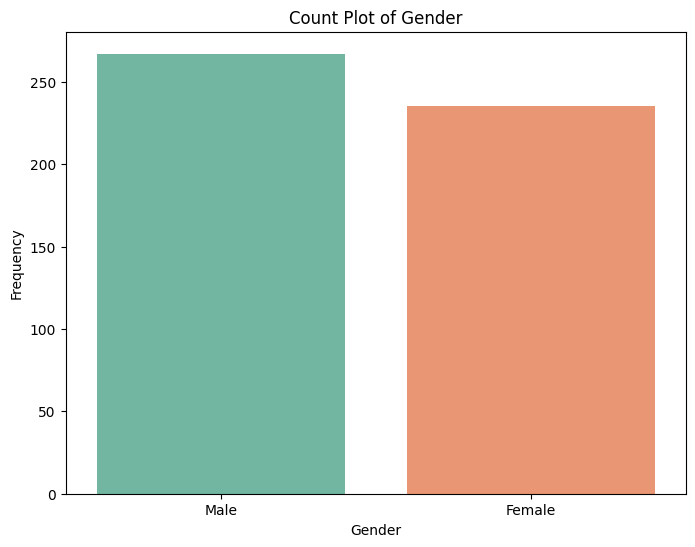

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


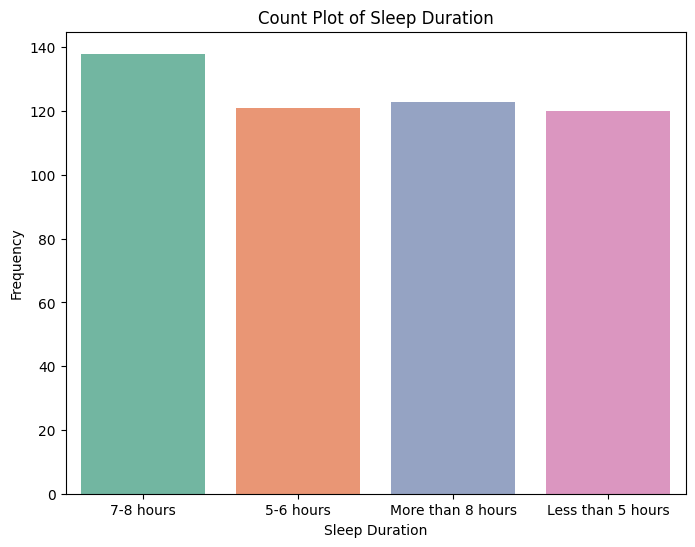

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


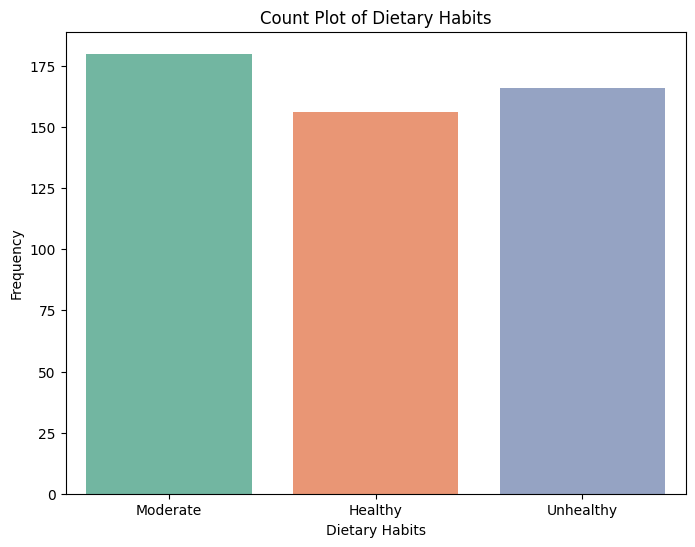

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


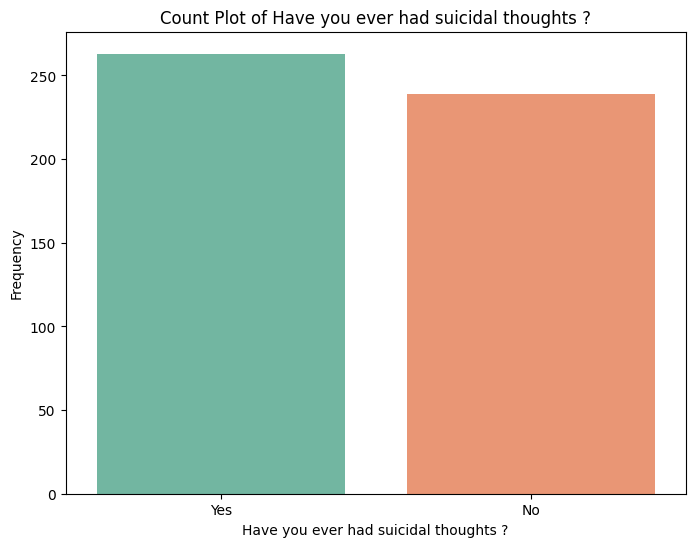

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


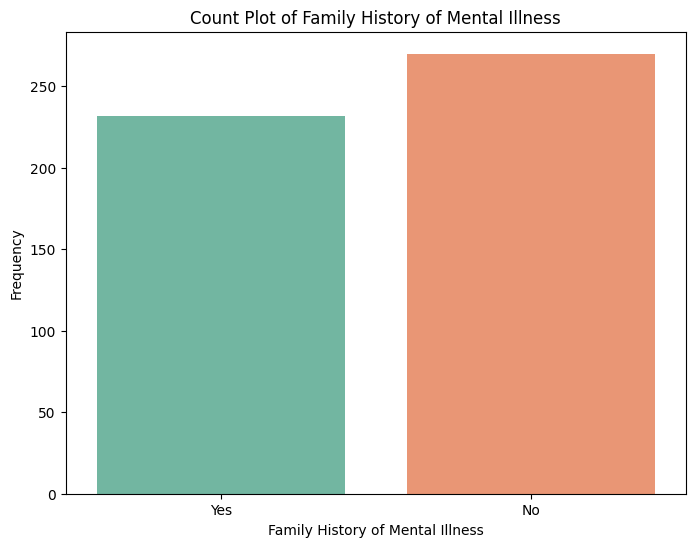

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3988008138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


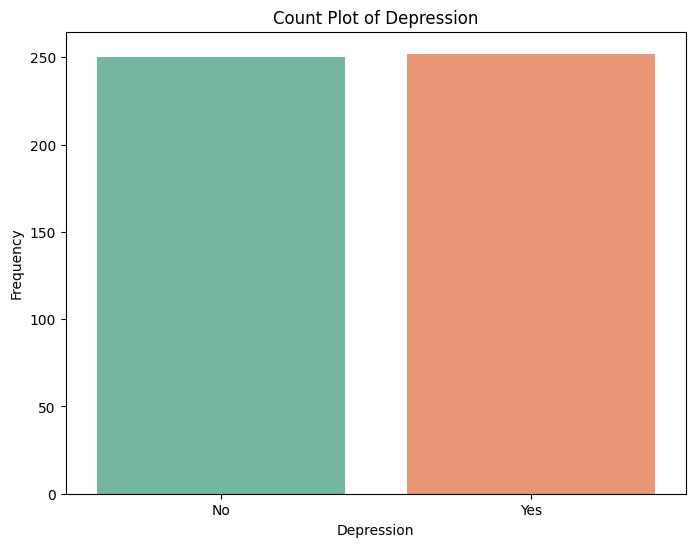

In [35]:
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [42]:
categorical_columns = data.select_dtypes(include='object').columns

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(data_encoded.head())

   ID   Age  Academic Pressure  Study Hours  Financial Stress  Gender_Male  \
0   1  28.0                2.0          9.0               2.0         True   
1   2  28.0                NaN          7.0               NaN         True   
2   3  25.0                1.0         10.0               4.0         True   
3   4  23.0                1.0          7.0               2.0         True   
4   5  31.0                1.0          4.0               2.0        False   

   Sleep Duration_7-8 hours  Sleep Duration_Less than 5 hours  \
0                      True                             False   
1                     False                             False   
2                     False                             False   
3                     False                             False   
4                     False                             False   

   Sleep Duration_More than 8 hours  Dietary Habits_Moderate  \
0                             False                     True   
1           

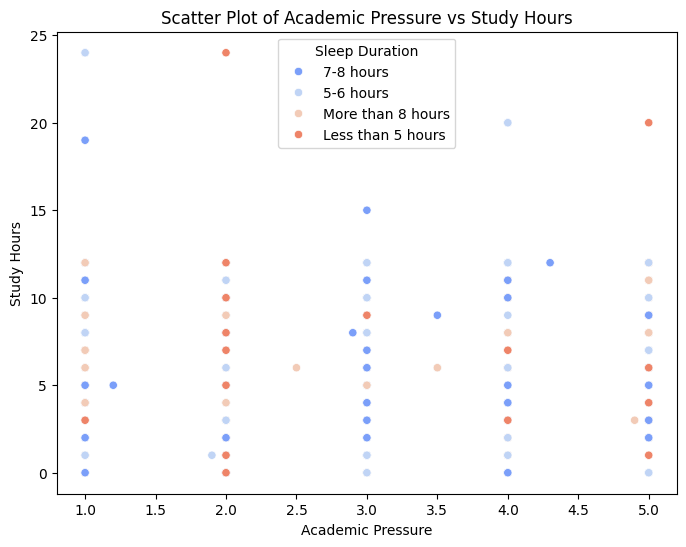

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Academic Pressure', y='Study Hours', hue='Sleep Duration', palette='coolwarm')
plt.title("Scatter Plot of Academic Pressure vs Study Hours")
plt.xlabel("Academic Pressure")
plt.ylabel("Study Hours")
plt.show()


The scatter plot illustrates the relationship between academic pressure and study hours, segmented by sleep duration. It shows that study hours are distributed across different levels of academic pressure, with some clustering at moderate levels of pressure (e.g., 3) and varying sleep durations. Individuals with 7-8 hours of sleep are more evenly distributed, while those sleeping less than 5 hours or more than 8 hours are fewer in number and spread sporadically across the pressure levels. This suggests that while academic pressure influences study hours, sleep duration might also play a role in the balance between study habits and well-being.

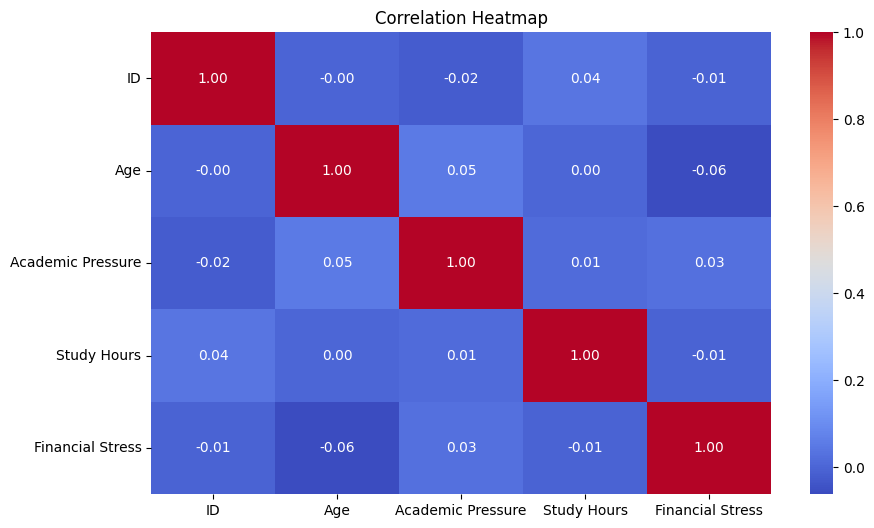

In [38]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap displays the relationships between numeric variables in the dataset, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Most variables exhibit weak or negligible correlations, as indicated by values close to 0. Notably, academic pressure, study hours, and financial stress show minimal influence on each other, with correlations near zero. Similarly, age does not strongly correlate with other variables, as seen from its low correlation coefficients. This suggests that the dataset's numeric features are largely independent of one another, indicating a lack of linear relationships between them.

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\3304015260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Academic Pressure', y='Study Hours', palette='Set3')


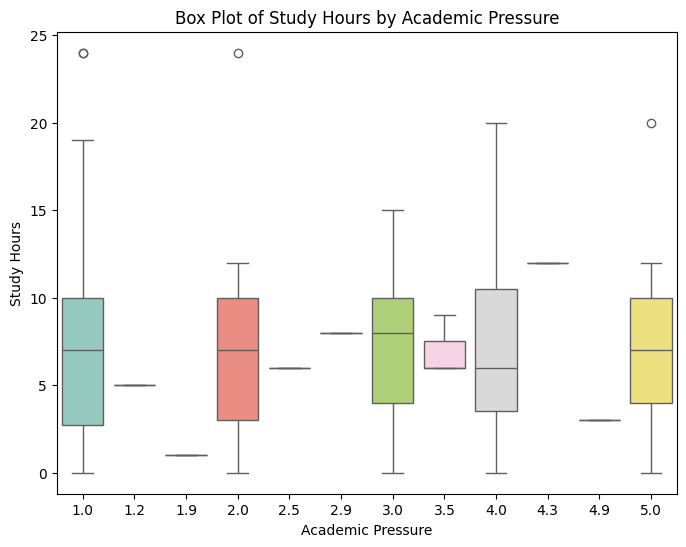

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Academic Pressure', y='Study Hours', palette='Set3')
plt.title("Box Plot of Study Hours by Academic Pressure")
plt.xlabel("Academic Pressure")
plt.ylabel("Study Hours")
plt.show()

This is a box plot that is used to show how the data is distributed and whats the mid value of the dataset. Here we have Boxplot to compare values within groups
Boxplot is used to compare values within groups. It is used to compare the distribution of data in study hours and academic pressure. We can see a bunch of outliers as well

C:\Users\ncmia\AppData\Local\Temp\ipykernel_14196\210591289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Academic Pressure', y='Study Hours', palette='muted')


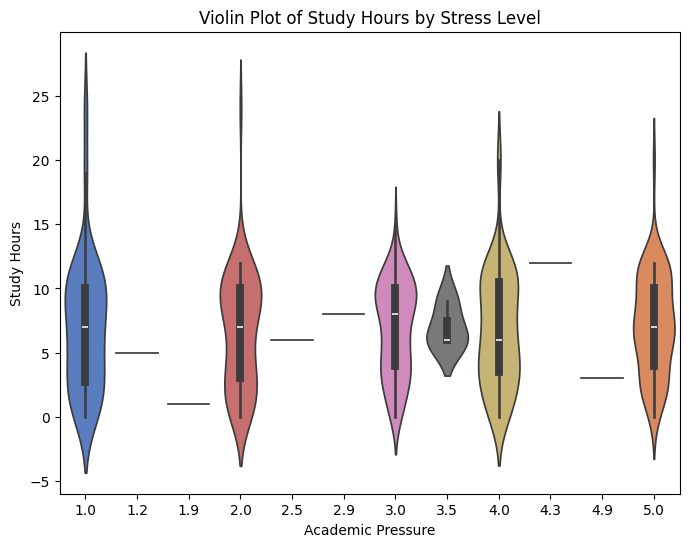

In [40]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Academic Pressure', y='Study Hours', palette='muted')
plt.title("Violin Plot of Study Hours by Stress Level")
plt.xlabel("Academic Pressure")
plt.ylabel("Study Hours")
plt.show()

Violin plots are particularly useful for comparing distributions across multiple groups or categories. Unlike a box plot, which focuses on summary statistics, the violin plot reveals the entire distribution, including any multimodal patterns, outliers, or skewness, making it a powerful tool for understanding the nuances of the data.